Yapay Zeka ile Tahmin Algoritması

Enes COŞKUN

In [1]:
import sys
print(sys.version)

3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/My Drive/YZPROJE')
!pwd

/content/drive/My Drive/YZPROJE


In [4]:
import pandas as pd
VeriSetiYolu = '/content/drive/My Drive/YZPROJE/veriseti/' #veri seti https://data.ibb.gov.tr/ adresinden alınmıştır.
csv_dosyalari = [dosya for dosya in os.listdir(VeriSetiYolu) if dosya.endswith('.csv')]
csv_dosya_sayisi = len(csv_dosyalari)
print("VeriSetiYolu dosyası içerisinde", csv_dosya_sayisi, "tane *.csv uzantılı dosyası bulunmaktadır.")
print("Bulunan CSV Dosyaları:")
for dosya in csv_dosyalari:
    print(dosya)

VeriSetiYolu dosyası içerisinde 1 tane *.csv uzantılı dosyası bulunmaktadır.
Bulunan CSV Dosyaları:
evsel.csv


In [5]:
import matplotlib.pyplot as plt
dosya_yolu = '/content/drive/My Drive/YZPROJE/veriseti/evsel.csv'
csv_dosya = pd.read_csv(dosya_yolu)
print(csv_dosya)

             İlçe     2004     2005     2006     2007     2008     2009  \
0          Adalar    7.834   10.615   17.228   12.102   12.232   13.228   
1      Arnavutköy   14.742   17.055   29.874   31.163   30.187   39.603   
2        Ataşehir   99.570  108.725  116.350  115.838  108.804   57.172   
3         Avcılar   76.741   68.579  102.550  113.784  106.832  121.277   
4    Bahçelievler  165.395  186.014  200.850  198.891  193.768  208.109   
5        Bağcılar  192.223  205.455  244.660  249.504  231.711  262.991   
6        Bakırköy   79.952   96.202  100.950  102.793   95.940  115.591   
7      Başakşehir   51.544   53.788   61.680   63.725   60.990   42.982   
8      Bayrampaşa   84.695   90.010  104.328  104.432   97.047  116.542   
9        Beşiktaş   96.470  102.525  113.975  113.856  103.750  119.804   
10         Beykoz   61.959   72.943   80.509   78.233   74.756   88.563   
11     Beylikdüzü    6.220    5.358    5.936    6.511    6.586   64.238   
12        Beyoğlu  109.79

In [6]:
VeriSetiYolu = '/content/drive/My Drive/YZPROJE/veriseti/evsel.csv'
data = pd.read_csv(VeriSetiYolu, delimiter=',')
for i in data.columns[2:]:
    if data[i].dtype == 'object':
        data[i] = data[i].str.replace(',', '').str.replace('.', '').astype(int)
print(data.head())

           İlçe     2004     2005     2006     2007     2008     2009  \
0        Adalar    7.834   10.615   17.228   12.102   12.232   13.228   
1    Arnavutköy   14.742   17.055   29.874   31.163   30.187   39.603   
2      Ataşehir   99.570  108.725  116.350  115.838  108.804   57.172   
3       Avcılar   76.741   68.579  102.550  113.784  106.832  121.277   
4  Bahçelievler  165.395  186.014  200.850  198.891  193.768  208.109   

      2010     2011     2012  ...     2014     2015     2016     2017  \
0   11.884   12.109   12.077  ...   23.531   12.004   12.711   12.604   
1   51.041   53.779   59.294  ...   74.446   88.765   88.435   94.141   
2  136.509  145.206  153.265  ...  173.099  179.390  183.933  180.546   
3  113.793  115.190  119.614  ...  147.880  183.128  171.638  164.914   
4  189.725  187.098  190.638  ...  217.869  212.794  217.714  220.362   

      2018     2019     2020     2021     2022     2023  
0   14.898   16.718   11.466   11.544   11.004   11.109  
1   94

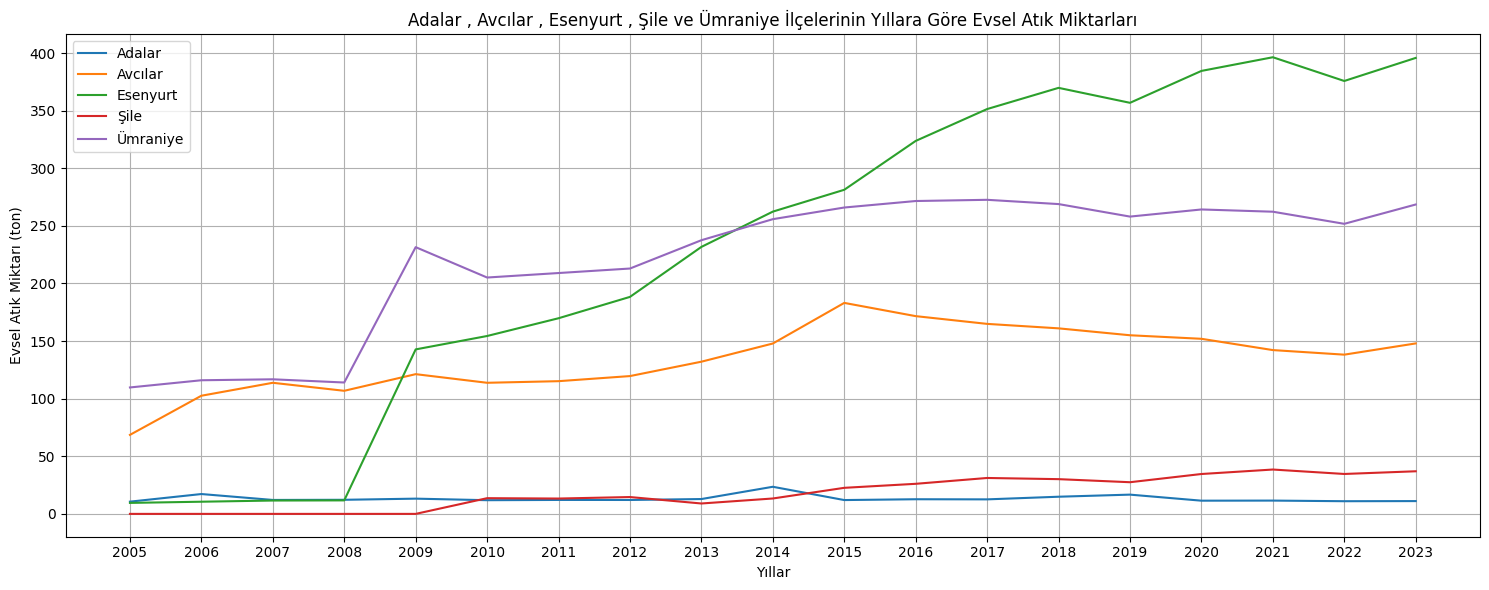

In [7]:
import matplotlib.ticker as ticker
ilceler = ["Adalar" , "Avcılar" , "Esenyurt" , "Şile" , "Ümraniye"]
filtre = data[data['İlçe'].isin(ilceler)]
plt.figure(figsize=(15, 6))
for ilce in ilceler:
    ilce_data = filtre[filtre['İlçe'] == ilce]
    plt.plot(data.columns[2:], ilce_data.iloc[0, 2:], label=ilce)
plt.xlabel('Yıllar')
plt.ylabel('Evsel Atık Miktarı (ton)')
plt.title('Adalar , Avcılar , Esenyurt , Şile ve Ümraniye İlçelerinin Yıllara Göre Evsel Atık Miktarları')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
!pip install plotly

In [9]:
import plotly.graph_objects as go
ilce_bilgileri = ["Adalar" , "Avcılar" , "Esenyurt" , "Şile" , "Ümraniye"]
filtre = data[data['İlçe'].isin(ilce_bilgileri)]
fig = go.Figure()
for ilce in ilce_bilgileri:
    ilce_data = filtre[filtre['İlçe'] == ilce]
    fig.add_trace(go.Scatter(
         x=data.columns[2:],
         y=ilce_data.iloc[0, 2:],
         mode='lines+markers',
         line=dict(width=3),
         name=ilce
        ))
fig.update_layout(
        title='Adalar , Avcılar , Esenyurt , Şile ve Ümraniye İlçelerinin Yıllara Göre Evsel Atık Miktarları',
        xaxis_title='Yıllar',
        yaxis_title='Evsel Atık (ton)',
        yaxis=dict(tickformat=','),
        template='plotly_white'
)
fig.show()

In [10]:
!pip install tensorflow

In [11]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
selected_ilces = ["Adalar" , "Avcılar" , "Esenyurt" , "Şile" , "Ümraniye"]
filtered_data = data[data['İlçe'].isin(selected_ilces)]
ilce = 'Avcılar'
ilce_data = filtered_data[filtered_data['İlçe'] == ilce].iloc[0, 2:].values.reshape(-1, 1)
years = data.columns[2:].astype(int)
scaler = MinMaxScaler(feature_range=(0, 1))
ilce_data_scaled = scaler.fit_transform(ilce_data)
def create_dataset(dataset, tahmin_adimi=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - tahmin_adimi):
        a = dataset[i:(i + tahmin_adimi), 0]
        dataX.append(a)
        dataY.append(dataset[i + tahmin_adimi, 0])
    return np.array(dataX), np.array(dataY)
tahmin_adimi = 4
trainX, trainY = create_dataset(ilce_data_scaled, tahmin_adimi)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(tahmin_adimi, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
12/12 - 8s - 666ms/step - loss: 0.3700 - val_loss: 0.1610
Epoch 2/100
12/12 - 0s - 22ms/step - loss: 0.1284 - val_loss: 0.0074
Epoch 3/100
12/12 - 0s - 12ms/step - loss: 0.0393 - val_loss: 0.0814
Epoch 4/100
12/12 - 0s - 12ms/step - loss: 0.0226 - val_loss: 0.0071
Epoch 5/100
12/12 - 0s - 6ms/step - loss: 0.0355 - val_loss: 0.0064
Epoch 6/100
12/12 - 0s - 12ms/step - loss: 0.0277 - val_loss: 0.0416
Epoch 7/100
12/12 - 0s - 9ms/step - loss: 0.0263 - val_loss: 0.0205
Epoch 8/100
12/12 - 0s - 10ms/step - loss: 0.0262 - val_loss: 0.0165
Epoch 9/100
12/12 - 0s - 7ms/step - loss: 0.0256 - val_loss: 0.0212
Epoch 10/100
12/12 - 0s - 8ms/step - loss: 0.0297 - val_loss: 0.0141
Epoch 11/100
12/12 - 0s - 12ms/step - loss: 0.0264 - val_loss: 0.0387
Epoch 12/100
12/12 - 0s - 6ms/step - loss: 0.0269 - val_loss: 0.0135
Epoch 13/100
12/12 - 0s - 12ms/step - loss: 0.0262 - val_loss: 0.0148
Epoch 14/100
12/12 - 0s - 12ms/step - loss: 0.0254 - val_loss: 0.0207
Epoch 15/100
12/12 - 0s - 7ms/ste

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


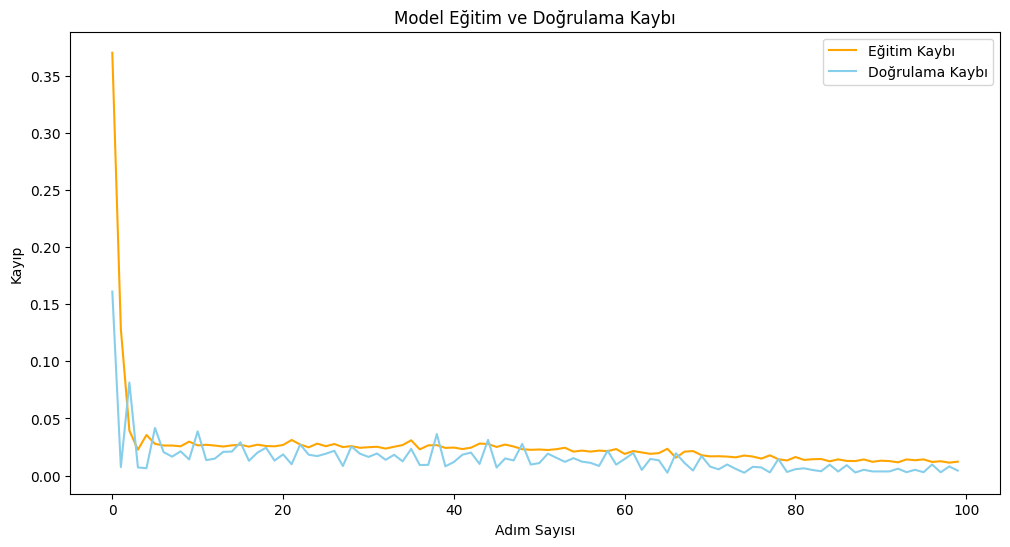

In [12]:
trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
test_data = ilce_data_scaled[-tahmin_adimi:]
test_data = np.reshape(test_data, (1, tahmin_adimi, 1))
test_predict = model.predict(test_data)
test_predict = scaler.inverse_transform(test_predict)
test_y = ilce_data[-1:]
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Eğitim Kaybı', color='orange')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı', color='skyblue')
plt.title('Model Eğitim ve Doğrulama Kaybı')
plt.xlabel('Adım Sayısı')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

In [13]:
Modelin_kayip_degeri = [loss * 100 for loss in history.history['loss']]
for epoch, loss in enumerate(Modelin_kayip_degeri, 1):
    print(f"Eğitim Adımı {epoch}: Kayıp Oranı = {loss:.2f}%")
Kayip_hesabi = np.mean(Modelin_kayip_degeri)
print("Eğitim Modelinin Toplam Kayıp Oranı (Yüzdelik): ", Kayip_hesabi)
print("Eğitim Modelinin Başarı Oranı (Yüzdelik): ", 100-Kayip_hesabi)

Eğitim Adımı 1: Kayıp Oranı = 37.00%
Eğitim Adımı 2: Kayıp Oranı = 12.84%
Eğitim Adımı 3: Kayıp Oranı = 3.93%
Eğitim Adımı 4: Kayıp Oranı = 2.26%
Eğitim Adımı 5: Kayıp Oranı = 3.55%
Eğitim Adımı 6: Kayıp Oranı = 2.77%
Eğitim Adımı 7: Kayıp Oranı = 2.63%
Eğitim Adımı 8: Kayıp Oranı = 2.62%
Eğitim Adımı 9: Kayıp Oranı = 2.56%
Eğitim Adımı 10: Kayıp Oranı = 2.97%
Eğitim Adımı 11: Kayıp Oranı = 2.64%
Eğitim Adımı 12: Kayıp Oranı = 2.69%
Eğitim Adımı 13: Kayıp Oranı = 2.62%
Eğitim Adımı 14: Kayıp Oranı = 2.54%
Eğitim Adımı 15: Kayıp Oranı = 2.64%
Eğitim Adımı 16: Kayıp Oranı = 2.69%
Eğitim Adımı 17: Kayıp Oranı = 2.53%
Eğitim Adımı 18: Kayıp Oranı = 2.70%
Eğitim Adımı 19: Kayıp Oranı = 2.58%
Eğitim Adımı 20: Kayıp Oranı = 2.56%
Eğitim Adımı 21: Kayıp Oranı = 2.68%
Eğitim Adımı 22: Kayıp Oranı = 3.11%
Eğitim Adımı 23: Kayıp Oranı = 2.71%
Eğitim Adımı 24: Kayıp Oranı = 2.47%
Eğitim Adımı 25: Kayıp Oranı = 2.80%
Eğitim Adımı 26: Kayıp Oranı = 2.56%
Eğitim Adımı 27: Kayıp Oranı = 2.76%
Eğitim A

Son epoch'taki başarı oranı: 98.79%


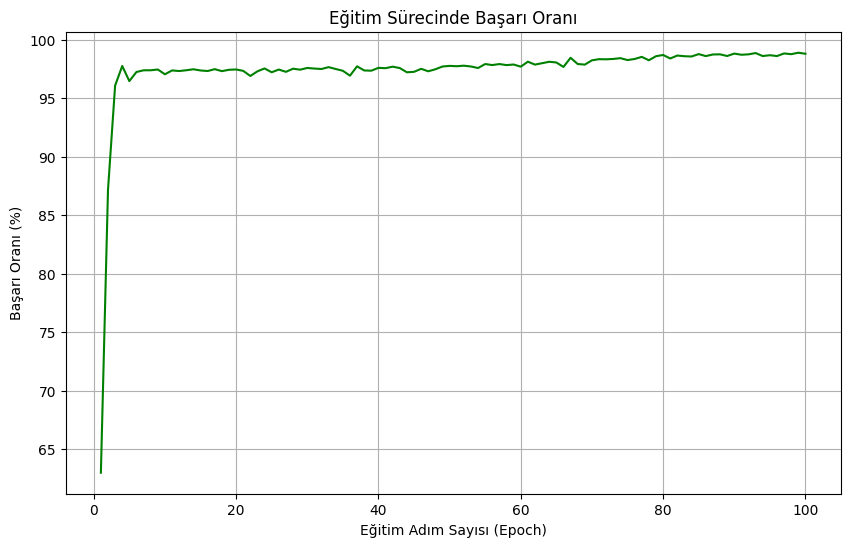

In [14]:
Modelin_kayip_degeri = [loss * 100 for loss in history.history['loss']]
Basari_orani = [100 - loss for loss in Modelin_kayip_degeri]
epoch_sayisi = range(1, len(Basari_orani) + 1)
son_basari_orani = Basari_orani[-1]
print(f"Son epoch'taki başarı oranı: {son_basari_orani:.2f}%")
plt.figure(figsize=(10, 6))
plt.plot(epoch_sayisi, Basari_orani, linestyle='-', color='g')
plt.title("Eğitim Sürecinde Başarı Oranı")
plt.xlabel("Eğitim Adım Sayısı (Epoch)")
plt.ylabel("Başarı Oranı (%)")
plt.grid(True)
plt.show()

Son epoch'taki hata oranı: 1.21%


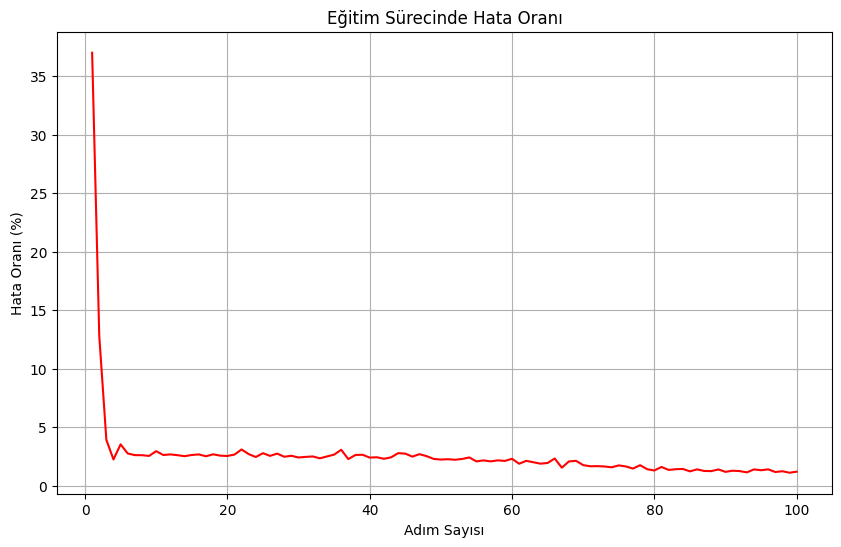

In [15]:
Modelin_kayip_degeri = [loss * 100 for loss in history.history['loss']]
epoch_sayisi = range(1, len(Modelin_kayip_degeri) + 1)
son_hata_orani = Modelin_kayip_degeri[-1]
print(f"Son epoch'taki hata oranı: {son_hata_orani:.2f}%")
plt.figure(figsize=(10, 6))
plt.plot(epoch_sayisi, Modelin_kayip_degeri, linestyle='-', color='r')
plt.title("Eğitim Sürecinde Hata Oranı")
plt.xlabel("Adım Sayısı")
plt.ylabel("Hata Oranı (%)")
plt.grid(True)
plt.show()

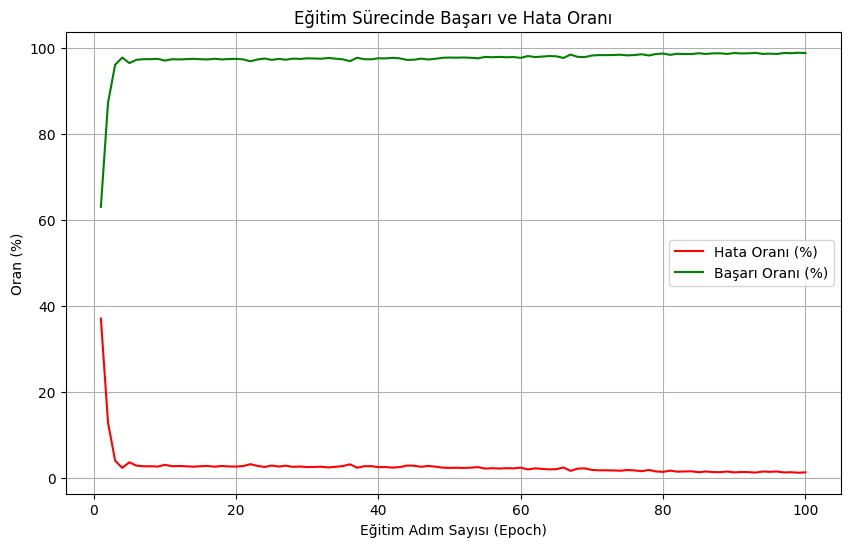

In [16]:
Modelin_kayip_degeri = [loss * 100 for loss in history.history['loss']]
Basari_orani = [100 - loss for loss in Modelin_kayip_degeri]
epoch_sayisi = range(1, len(Modelin_kayip_degeri) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epoch_sayisi, Modelin_kayip_degeri, linestyle='-', color='r', label='Hata Oranı (%)')
plt.plot(epoch_sayisi, Basari_orani, linestyle='-', color='g', label='Başarı Oranı (%)')
plt.title("Eğitim Sürecinde Başarı ve Hata Oranı")
plt.xlabel("Eğitim Adım Sayısı (Epoch)")
plt.ylabel("Oran (%)")
plt.legend()
plt.grid(True)
plt.show()

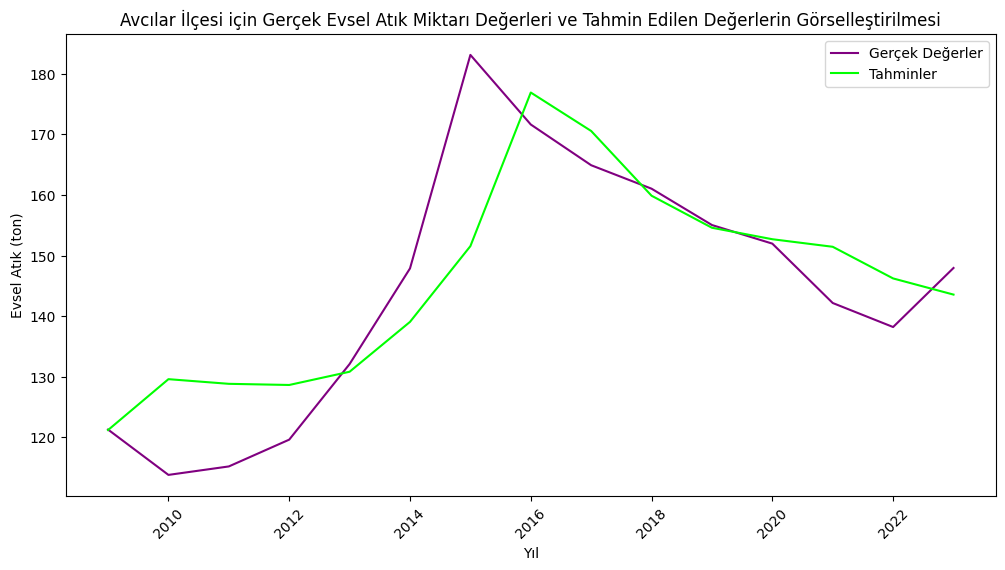

In [17]:
time_step = len(ilce_data) - len(trainY[0])
plt.figure(figsize=(12, 6))
plt.plot(years[time_step:time_step + len(trainY[0])], trainY[0], label='Gerçek Değerler', color='purple')
plt.plot(years[time_step:time_step + len(trainPredict)], trainPredict, label='Tahminler', color='lime')
plt.title('Avcılar İlçesi için Gerçek Evsel Atık Miktarı Değerleri ve Tahmin Edilen Değerlerin Görselleştirilmesi')
plt.xlabel('Yıl')
plt.ylabel('Evsel Atık (ton)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [18]:
farklar = np.array(trainY[0]) - np.array(trainPredict)
mutlak_farklar = np.abs(farklar)
yuzdelik_hatalar = (mutlak_farklar / np.array(trainY[0])) * 100
ortalama_yuzdelik_hata = np.mean(yuzdelik_hatalar)
for year, gercek, tahmin, fark in zip(years[time_step:time_step + len(trainY[0])], trainY[0], trainPredict.flatten(), mutlak_farklar.flatten()):
    print("Yıl:", year ,"Gerçek: ", gercek, "Tahmin: ", tahmin, "Mutlak Fark: ", fark)
print("Ortalama Mutlak Hata: ", ortalama_yuzdelik_hata)

Yıl: 2009 Gerçek:  121.277 Tahmin:  121.19656 Mutlak Fark:  0.08043627929687602
Yıl: 2010 Gerçek:  113.793 Tahmin:  129.59642 Mutlak Fark:  7.403563720703119
Yıl: 2011 Gerçek:  115.19 Tahmin:  128.82721 Mutlak Fark:  6.006563720703127
Yıl: 2012 Gerçek:  119.614 Tahmin:  128.63794 Mutlak Fark:  1.5825637207031207
Yıl: 2013 Gerçek:  132.095 Tahmin:  130.82338 Mutlak Fark:  10.898436279296874
Yıl: 2014 Gerçek:  147.88 Tahmin:  139.0542 Mutlak Fark:  26.68343627929687
Yıl: 2015 Gerçek:  183.128 Tahmin:  151.55835 Mutlak Fark:  61.93143627929686
Yıl: 2016 Gerçek:  171.638 Tahmin:  176.9152 Mutlak Fark:  50.44143627929688
Yıl: 2017 Gerçek:  164.914 Tahmin:  170.5675 Mutlak Fark:  43.71743627929686
Yıl: 2018 Gerçek:  161.04 Tahmin:  159.88048 Mutlak Fark:  39.84343627929687
Yıl: 2019 Gerçek:  155.042 Tahmin:  154.59192 Mutlak Fark:  33.84543627929688
Yıl: 2020 Gerçek:  151.971 Tahmin:  152.69862 Mutlak Fark:  30.77443627929688
Yıl: 2021 Gerçek:  142.17 Tahmin:  151.45111 Mutlak Fark:  20.9734

In [19]:
Sistemin_toplam_hata_payi = abs(Kayip_hesabi - ortalama_yuzdelik_hata)
print("Geliştirilen Sistemin Yüzdelik oranıdaki hata payı=> %",Sistemin_toplam_hata_payi)

Geliştirilen Sistemin Yüzdelik oranıdaki hata payı=> % 12.454515072733399
